In [48]:
import numpy as np
import pandas as pd
from ModelsCode.OLGModel.OLG_model_src import Parameters, OLG
import altair as alt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
countrydata_df = pd.read_csv('C:/Users/User/git/covid19-sim/Resources/all_dates.csv', parse_dates=['date'])[['country', 'StringencyIndex', 'date', 'total_cases']]

In [50]:
countrydata_df.rename(columns={'total_cases':'I'}, inplace=True)#.query('country=="israel"')

In [51]:
scenario = {'t': {0: 20, 1: 80},
            'R0D': {0: 0, 1: 0}}

p = Parameters(tau=14, 
                init_infected=100, 
                fi=0.25, 
                theta=0.0771, 
                countries=['israel'], 
                scenario=scenario, 
                critical_condition_rate=0.035,
                       recovery_rate=0.4, 
                critical_condition_time=10,
                       recovery_time=6
               )

In [52]:
olg = OLG(countrydata_df, p)

[ 97. 109. 126.]
1 97.0 109.0
2 109.0 126.0
3 126.0 193.0
4 193.0 213.0
5 213.0 298.0
6 298.0 337.0
7 337.0 433.0
8 433.0 677.0
9 677.0 705.0
10 705.0 883.0
11 883.0 1071.0
12 1071.0 1442.0
13 1442.0 1930.0
14 1930.0 2369.0
15 2369.0 2693.0
16 2693.0 3035.0
17 3035.0 3619.0
18 3619.0 4247.0
19 4247.0 4695.0
20 4695.0 5358.0
21 5358.0 6092.0
22 6092.0 6857.0
23 6857.0 7428.0
24 7428.0 7851.0
25 7851.0 8430.0
26 8430.0 8904.0
27 8904.0 9248.0
28 9248.0 9404.0
29 9404.0 9968.0
30 9968.0 10408.0
Index(['country', 'StringencyIndex', 'date', 'I'], dtype='object')


C:\Users\User\Miniconda3\envs\py37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [53]:
 ####
olg.r0d
# print(olg.df[50:60]['R'])
# olg.df.I.plot.line()

array([1.08214369e+00, 9.86319261e-01, 8.98980142e-01, 8.19374950e-01,
       7.46818842e-01, 6.80687618e-01, 6.20412350e-01, 5.65474491e-01,
       5.15401410e-01, 4.69762328e-01, 4.28164613e-01, 3.90250398e-01,
       3.55693508e-01, 3.24196650e-01, 2.95488856e-01, 2.69323153e-01,
       2.45474438e-01, 2.23737540e-01, 2.03925456e-01, 1.85867744e-01,
       1.69409051e-01, 1.54407786e-01, 1.40734890e-01, 1.28272737e-01,
       1.16914115e-01, 1.06561305e-01, 9.71252422e-02, 8.85247480e-02,
       8.06858323e-02, 7.35410569e-02, 6.70289554e-02, 6.10935041e-02,
       5.56836403e-02, 5.07528229e-02, 4.62586322e-02, 4.21624046e-02,
       3.84289002e-02, 3.50259997e-02, 3.19244279e-02, 2.90975020e-02,
       2.65209020e-02, 2.41724614e-02, 2.20319765e-02, 2.00810327e-02,
       1.83028461e-02, 1.66821189e-02, 1.52049080e-02, 1.38585049e-02,
       1.26313266e-02, 1.15128156e-02, 1.04933493e-02, 9.56415742e-03,
       8.71724596e-03, 7.94532897e-03, 7.24176567e-03, 6.60050329e-03,
      

In [54]:
olg.r0d[-5:-2]

array([0.00016176, 0.00014744, 0.00013438])

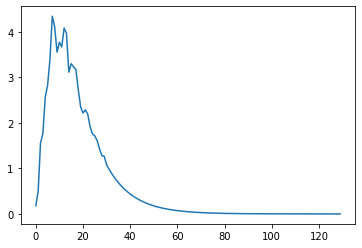

In [45]:
olg.df.R.plot.line()

In [47]:
# holt_model = Holt(olg.r_values[-14:], exponential=True).fit(smoothing_level=0.1, smoothing_slope=0.99)
# holt_model.forecast(25)[-1]

answer = [0, 0, 20]

for i in np.arange(0.05, 0.95, 0.05):
    for j in np.arange(0.05, 0.95, 0.05):
        holt_model = Holt(olg.r_values[-14:], exponential=True).fit(smoothing_level=i, smoothing_slope=j)
            if (i, j, holt_model.forecast(25)[-1]) <  answer[2]:
            answer = (i, j, holt_model.forecast(25)[-1])
            print(i, j, answer

    
    

IndentationError: unexpected indent (<ipython-input-47-cb60b006f032>, line 9)

In [28]:
answer

[(0.05, 0.05, 0.19896233156426726),
 (0.05, 0.1, 0.788045763173461),
 (0.05, 0.15000000000000002, 0.6408376044447762),
 (0.05, 0.2, 0.5267694003970839),
 (0.05, 0.25, 0.4376726701758098),
 (0.05, 0.3, 0.367540656322404),
 (0.05, 0.35000000000000003, 0.31192459135665507),
 (0.05, 0.4, 0.2675062471928765),
 (0.05, 0.45, 0.23179334386290656),
 (0.05, 0.5, 0.20290110979638842),
 (0.05, 0.55, 0.17939462399400005),
 (0.05, 0.6000000000000001, 0.16017430379023387),
 (0.05, 0.6500000000000001, 0.14439220610641365),
 (0.05, 0.7000000000000001, 0.13139046856891912),
 (0.05, 0.7500000000000001, 0.12065575438350973),
 (0.05, 0.8, 0.11178533473813206),
 (0.05, 0.8500000000000001, 0.10446168387386658),
 (0.05, 0.9000000000000001, 0.09843333748770247),
 (0.1, 0.05, 0.1983938503555596),
 (0.1, 0.1, 0.19959577627002223),
 (0.1, 0.15000000000000002, 0.3855053683894744),
 (0.1, 0.2, 0.2943725204741993),
 (0.1, 0.25, 0.23295172159375302),
 (0.1, 0.3, 0.1907353240723906),
 (0.1, 0.35000000000000003, 0.1612

In [ ]:
# var_in_multi_line selects one of the 3 variables: I, E, A in the country comparison plot
olg.plot_data(p.countries, var_in_multi_line='I')

In [ ]:
# due to sequantial days witout a change  some R_contagion_score behaved iradicly, so a limit of <10 on the variable was used 
# olg.plot_data_contagion_score()